In [9]:
import numpy as np
import pyfits
import math
from math import log10
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from matplotlib import rc
import pickle
import os
import astropy as ap
from astropy.cosmology import WMAP7
from scipy import interpolate
import corner
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors
from __future__ import unicode_literals
# rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'

# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Ubuntu'
# rcParams['font.monospace'] = 'Ubuntu Mono'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 16
rcParams['figure.titlesize'] = 1

os.chdir('/Users/nitya/Work/Data/Project1/measurements')
from scipy import interpolate

file1 = open(r'binned_data.pkl', 'rb')
dat = pickle.load(file1)
file1.close()

print(dat.dtype.names, dat.dtype)
ind = np.where(dat['counts'] >=5.0)[0]

print(len(dat[ind]))

doo = np.float64(np.array((dat)))
print(doo.dtype)

('bin', 'opt', 'inf', 'mass', 'logmass', 'magsfr', 'magphys', 'uvsfr', 'uv', 'env', 'counts') [('bin', '<f8'), ('opt', '<f8'), ('inf', '<f8'), ('mass', '<f8'), ('logmass', '<f8'), ('magsfr', '<f8'), ('magphys', '<f8'), ('uvsfr', '<f8'), ('uv', '<f8'), ('env', '<f8'), ('counts', '<i8')]
317
float64


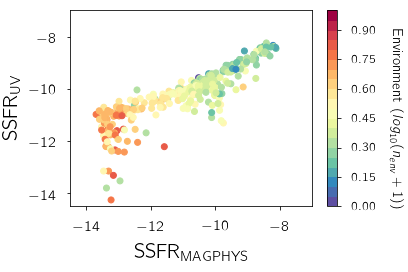

In [16]:
os.chdir('/Users/nitya/Work/Plots/Project1/')
d = dat[ind]

fig = plt.figure(figsize =(6,4))
ax = fig.add_subplot(111)
x = [-15.0, -12.0, -7.0]
y = [-15.0, -12.0, -7.0]

m = 0.7
c = 2.6

y2 = [m*x[i] - c for i in range(len(x))]
bounds1 = np.linspace(0, 1.0, 21)
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)

cs0 = ax.scatter(d['magphys'],d['uv'], c = np.log10(d['env']), cmap = plt.cm.Spectral_r, norm = norm1)
ax.set_xlabel(r'SSFR\textsubscript{MAGPHYS}', fontsize = 20, labelpad = 15.0)
ax.set_ylabel(r'SSFR\textsubscript{UV}', fontsize = 20, labelpad = 5.0)
# ax.plot(x,y, color = 'k',alpha=0.6, linestyle = '--')
# ax.plot(x,y2, color = 'k',alpha=0.6, linestyle = '--')
ax.set_xlim(-14.5,-7.0)
ax.set_ylim(-14.5,-7.0)
ax.xaxis.set_ticks([-14.0,-12.0,-10.0,-8.0])
ax.yaxis.set_ticks([-14.0,-12.0,-10.0,-8.0])
#plt.title('Environment')
fig.text(0.95, 0.5, r'Environment ($log_{10}(n_{env}+1)$)',ha='center', va='center', rotation=270,fontsize = 14)
cbar = fig.colorbar(cs0)
cbar.ax.tick_params(labelsize=13)
plt.gcf().subplots_adjust(bottom = 0.2)
plt.gcf().subplots_adjust(left = 0.2)
#plt.tight_layout()
#plt.gcf().subplots_adjust(bottom = 0.2)
#plt.colorbar(cs0)
plt.savefig('env_plot.pdf')

plt.show()

(317,) float64
(317,) float64
(317,) float64
(317,) (317,) (317,)


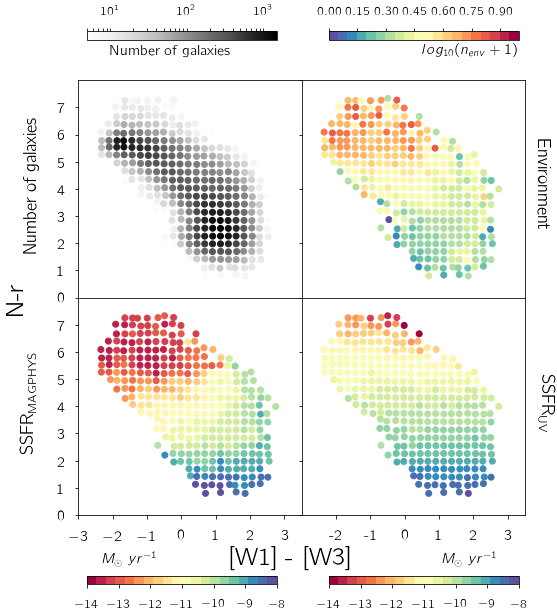

In [17]:
#Let's make a panel plot brah

f = plt.figure(figsize=(8,8)) # Notice the equal aspect ratio
ax = [f.add_subplot(2,2,i+1) for i in range(4)]
f.subplots_adjust(wspace=0, hspace = 0)
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]
ax4 = ax[3]


cs1 = ax1.scatter(d['inf'],d['opt'], c = d['counts'], 
                  cmap = plt.cm.Greys, norm=colors.LogNorm())
ax1.set_xlim(-3.0,3.5)
ax1.set_ylim(0,8.0)
ax1.xaxis.set_ticklabels([])
ax1.set_yticks([0,1.0,2.0,3.0,4.0,5.0,6.0,7.0])
#ax1.yaxis.set_ticklabels([0.0, ,2.0, ,4.0, ,6.0])

bounds1 = np.linspace(0, 1.0, 21)
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
cs2 = ax2.scatter(d['inf'],d['opt'], c = np.log10(d['env']), 
                  cmap = plt.cm.Spectral_r, norm = norm1)
ax2.set_xlim(-3.0,3.5)
ax2.set_ylim(0,8.0)
ax2.yaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])


bounds2 = np.linspace(-14, -8, 21)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)

#cs3b = ax3.tricontour(np.float64(d['inf']),np.float64(d['opt']),np.float64(d['mag']),6,linestyles = 'solid', linewidths= 5, colors = '0.75', zorder = 1)
cs3 = ax3.scatter(d['inf'],d['opt'], c = d['magphys'], cmap = plt.cm.Spectral, zorder = 2, norm = norm2)
ax3.set_xlim(-3.0,3.5)
ax3.set_ylim(0,8.0)
ax3.yaxis.set_ticklabels([0,1,2,3,4,5,6,7])
ax3.set_xticks([-3,-2,-1,0,1,2,3])
ax3.set_yticks([0,1.0,2.0,3.0,4.0,5.0,6.0,7.0])
#ax3.yaxis.set_ticklabels([0.0, ,2.0, ,4.0, ,6.0])

inf_arr = np.array(d['inf'])
uv_arr = np.array(d['uv'])
opt_arr = np.array(d['opt'])

print(inf_arr.shape, inf_arr.dtype)
print(uv_arr.shape, uv_arr.dtype)
print(opt_arr.shape, opt_arr.dtype)

print(np.shape(d['inf']), np.shape(d['uv']), np.shape(d['opt']))

#bounds = [-14.0,-13.0,-12.0,-11.0,-10.0,-9.0,-8.0]




#cs4b = ax4.tricontour(np.float64(d['inf']),np.float64(d['opt']),np.float64(d['uv']),5,linestyles = 'solid', linewidths= 5, cmap = plt.cm.Spectral, zorder = 1, alpha = 0.5)
cs4 = ax4.scatter(d['inf'],d['opt'], c = d['uv'], cmap = plt.cm.Spectral,zorder = 2, norm = norm2)
#ax4.clabel(cs5, cs5.levels)
ax4.set_xlim(-3.0,3.5)
ax4.set_ylim(0,8.0)
ax4.set_xticks([-2,-1,0,1,2,3])
ax4.xaxis.set_ticklabels([-2,-1,0,1,2,3])
ax4.yaxis.set_ticklabels([])

f.text(0.495, 0.05, '[W1] - [W3]', ha='center', va='center', fontsize = 25)
f.text(0.02, 0.5, 'N-r', ha='center', va='center', rotation='vertical', fontsize = 25)
f.text(0.045, 0.7, 'Number of galaxies', ha='center', va='center', rotation=90, fontsize = 18)
f.text(0.93, 0.7, 'Environment', ha='center', va='center', rotation=270, fontsize = 18)
f.text(0.045, 0.32, r'SSFR\textsubscript{MAGPHYS}', ha='center', va='center', rotation=90, fontsize = 18)
f.text(0.93, 0.32, r'SSFR\textsubscript{UV}', ha='center', va='center', rotation=270, fontsize = 18)

f.text(0.285, 0.93, 'Number of galaxies', ha='center', va='center',fontsize = 15)
f.text(0.805, 0.93, r'$log_{10}(n_{env}+1)$', ha='center', va='center',fontsize = 15)
f.text(0.215, 0.046, r'$M_{\odot}$ $yr^{-1}$', ha='center', va='center',fontsize = 15)
f.text(0.805, 0.046, r'$M_{\odot}$ $yr^{-1}$', ha='center', va='center',fontsize = 15)


cbar_ax1 = f.add_axes([0.14, 0.95, 0.33, 0.015])
cb1 = f.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.tick_params(labelsize=13)
cb1.ax.xaxis.set_ticks_position('top')

cbar_ax2 = f.add_axes([0.56, 0.95, 0.33, 0.015])
cb2 = f.colorbar(cs2,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)

cbar_ax3 = f.add_axes([0.14, 0.005, 0.33, 0.015])
cb3 = f.colorbar(cs3,orientation = 'horizontal', cax=cbar_ax3)
cb3.ax.tick_params(labelsize=13)
cb3.set_clim(-14.0,-8.0)
cb3.set_ticks([-14.0,-13.0,-12.0,-11.0,-10.0,-9.0,-8.0])

cbar_ax4 = f.add_axes([0.56, 0.005, 0.33, 0.015])
cb4 = f.colorbar(cs4,orientation = 'horizontal', cax=cbar_ax4)
cb4.set_clim(-14.0,-8.0)
cb4.set_ticks([-14.0,-13.0,-12.0,-11.0,-10.0,-9.0,-8.0])
cb4.ax.tick_params(labelsize=13)
#plt.tight_layout()
#f.subplots_adjust(wspace=0, hspace=0)
#plt.rcParams['font.size'] = 10
plt.savefig('panel_plot.pdf', bbox_inches='tight')
plt.show()
